In [1]:
%matplotlib inline
from data.dataLoader import *
import torch.utils.data as data
import numpy as np
from models.model_resnet import ResnetDispModel
from Validator import Validator
from trainer import Trainer

In [2]:
val_dataset = TwoViewDataset("data/dataset/", is_train=False, transforms=JointToTensor())
trn_dataset = TwoViewDataset("data/dataset/", is_train=True, transforms=JointToTensor())

In [3]:
val_loader = data.DataLoader(val_dataset, batch_size=1, num_workers=1, shuffle=False)
trn_loader = data.DataLoader(trn_dataset, batch_size=8, num_workers=1, shuffle=False)

In [4]:
val_dataset[0]

(tensor([[[0.0392, 0.0392, 0.0549,  ..., 0.1608, 0.1843, 0.1333],
          [0.0275, 0.0275, 0.0510,  ..., 0.1843, 0.1843, 0.1490],
          [0.0353, 0.0314, 0.0471,  ..., 0.2510, 0.1882, 0.1176],
          ...,
          [0.0471, 0.0510, 0.0549,  ..., 1.0000, 1.0000, 1.0000],
          [0.0510, 0.0510, 0.0549,  ..., 1.0000, 1.0000, 1.0000],
          [0.0510, 0.0549, 0.0588,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.0431, 0.0431, 0.0549,  ..., 0.1843, 0.1216, 0.1373],
          [0.0314, 0.0275, 0.0510,  ..., 0.1098, 0.1020, 0.1725],
          [0.0392, 0.0314, 0.0471,  ..., 0.1294, 0.1059, 0.1608],
          ...,
          [0.0392, 0.0431, 0.0471,  ..., 1.0000, 1.0000, 1.0000],
          [0.0431, 0.0431, 0.0471,  ..., 1.0000, 1.0000, 1.0000],
          [0.0431, 0.0471, 0.0510,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.0235, 0.0235, 0.0471,  ..., 0.0353, 0.0000, 0.0000],
          [0.0118, 0.0196, 0.0431,  ..., 0.1333, 0.1294, 0.1569],
          [0.0196, 0.0235, 0.0392,  ...,

In [5]:
network = ResnetDispModel(3)

In [6]:
val = Validator(val_loader, 1, use_gpu=True)

In [7]:
opt = torch.optim.SGD(network.parameters(), lr=1e-2, weight_decay=1e-6,momentum=0.5,
                                nesterov=False)

In [8]:
# val.validate(network)

In [9]:
trn = Trainer(network, trn_loader, opt, 8, use_gpu=True)

In [10]:
trn.setValidator(val)

In [11]:
print(trn.validator)

In [12]:
trn.run_train(100)

/home/tempo/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


Epoch: 0 Loss: 0.3437651466254307
update model file with prev_score 3.754650612831116 and current score 2.6972690579891205
Epoch: 1 Loss: 0.24985712056007722
update model file with prev_score 2.6972690579891205 and current score 2.6201441309452056
Epoch: 2 Loss: 0.19902851122795887
Epoch: 3 Loss: 0.159878496505806
update model file with prev_score 2.6201441309452056 and current score 2.37322331404686
Epoch: 4 Loss: 0.14697629946243504
update model file with prev_score 2.37322331404686 and current score 2.347699587583542
Epoch: 5 Loss: 0.1411357944952729
update model file with prev_score 2.347699587583542 and current score 2.336324922323227
Epoch: 6 Loss: 0.13707906114058974
Epoch: 7 Loss: 0.13400607318212482
update model file with prev_score 2.336324922323227 and current score 2.3259559922218322
Epoch: 8 Loss: 0.1313900330569595
Epoch: 9 Loss: 0.12934672023655605
update model file with prev_score 2.3259559922218322 and current score 2.3182292473316193
Epoch: 10 Loss: 0.1277027218400136

In [23]:
trained_net = trn.net

In [24]:
for left, right in val_loader:
    
    sample = left
    break
from matplotlib import pyplot as plt
sample_np = np.array(sample)
sample_np.shape
# sample.size()

(1, 3, 256, 512)

In [25]:
sample_np =np.transpose( np.squeeze(sample_np), axes=(1,2,0))
print(sample_np.shape)

(256, 512, 3)


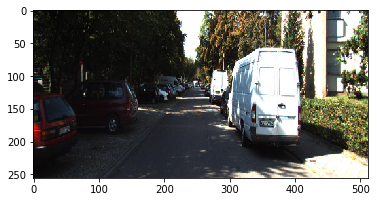

In [26]:
plt.imshow(sample_np)

In [27]:
disp1, disp2, disp3, disp4 = trained_net(sample.cuda())

In [28]:
disp1.size()

torch.Size([1, 2, 256, 512])

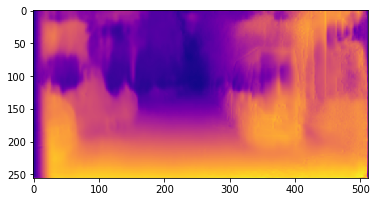

In [29]:
disp1_np = np.array(disp1.cpu().detach().numpy())
disp1_np =np.squeeze(disp1_np)[0]
plt.imshow(disp1_np, cmap="plasma")

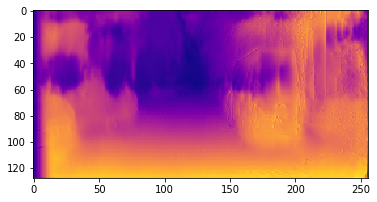

In [30]:
disp2_np = np.array(disp2.cpu().detach().numpy())
disp2_np =np.squeeze(disp2_np)[0]
plt.imshow(disp2_np, cmap="plasma")

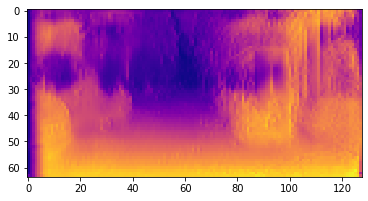

In [31]:
disp3_np = np.array(disp3.cpu().detach().numpy())
disp3_np =np.squeeze(disp3_np)[0]
plt.imshow(disp3_np, cmap="plasma")

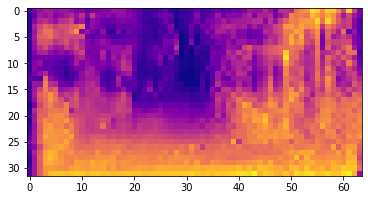

In [32]:
disp4_np = np.array(disp4.cpu().detach().numpy())
disp4_np =np.squeeze(disp4_np)[0]
plt.imshow(disp4_np, cmap="plasma")